# Implementing a convolutional autoencoder

In [1]:
import numpy as np
import scipy.io

from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential, Input, Model
from keras.layers.core import Dense, Dropout, Activation, Reshape, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


### Load the dataset and extract the data

In [3]:
mat = scipy.io.loadmat('data/train_32x32.mat')
mat = mat['X']
b, h, d, n = mat.shape

### Pre-process the data

In [4]:
#Convert all RGB-Images to greyscale
img_gray = np.zeros(shape =(n, b, h, 1))

def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

for i in range(n):
    #Convert to greyscale
    img = rgb2gray(mat[:,:,:,i])
    img = img.reshape(1, 32, 32, 1)
    img_gray[i,:] = img

# Normalize input
img_gray = img_gray/255.

### Define our network architecture for the convolutional autencoder

In [5]:
img_size = Input(shape=(b, h, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(img_size)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(img_size, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')#, metrics=['binary_accuracy'])

# Output summary of network
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

### Define the callback function for early stopping

In [6]:
callbacks = EarlyStopping(monitor='val_loss', patience=5)

### Define the hyperparameters and start training our network

In [14]:
n_epochs = 1000
batch_size = 128

autoencoder.fit(
    img_gray, img_gray,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True, 
    validation_split=0.2
)

Train on 58605 samples, validate on 14652 samples
Epoch 1/1000
58605/58605 [==============================] - 92s 2ms/step - loss: 0.6404 - val_loss: 0.6295
Epoch 2/1000
58605/58605 [==============================] - 86s 1ms/step - loss: 0.6277 - val_loss: 0.6230
Epoch 3/1000
58605/58605 [==============================] - 111s 2ms/step - loss: 0.6245 - val_loss: 0.6237
Epoch 4/1000
58605/58605 [==============================] - 113s 2ms/step - loss: 0.6226 - val_loss: 0.6228
Epoch 5/1000
58605/58605 [==============================] - 118s 2ms/step - loss: 0.6213 - val_loss: 0.6211
Epoch 6/1000
58605/58605 [==============================] - 124s 2ms/step - loss: 0.6204 - val_loss: 0.6194
Epoch 7/1000
58605/58605 [==============================] - 116s 2ms/step - loss: 0.6197 - val_loss: 0.6192
Epoch 8/1000
58605/58605 [==============================] - 115s 2ms/step - loss: 0.6192 - val_loss: 0.6190
Epoch 9/1000
58605/58605 [==============================] - 115s 2ms/step - loss: 0.6188

Epoch 76/1000
58605/58605 [==============================] - 111s 2ms/step - loss: 0.6188 - val_loss: 0.6208
Epoch 77/1000
58605/58605 [==============================] - 110s 2ms/step - loss: 0.6188 - val_loss: 0.6251
Epoch 78/1000
58605/58605 [==============================] - 110s 2ms/step - loss: 0.6190 - val_loss: 0.6195
Epoch 79/1000
58605/58605 [==============================] - 111s 2ms/step - loss: 0.6190 - val_loss: 0.6157
Epoch 80/1000
58605/58605 [==============================] - 111s 2ms/step - loss: 0.6191 - val_loss: 0.6160
Epoch 81/1000
58605/58605 [==============================] - 111s 2ms/step - loss: 0.6191 - val_loss: 0.6154
Epoch 82/1000
58605/58605 [==============================] - 110s 2ms/step - loss: 0.6191 - val_loss: 0.6188
Epoch 83/1000
58605/58605 [==============================] - 110s 2ms/step - loss: 0.6191 - val_loss: 0.6194
Epoch 84/1000
58605/58605 [==============================] - 111s 2ms/step - loss: 0.6192 - val_loss: 0.6171
Epoch 85/1000
58605

58605/58605 [==============================] - 84s 1ms/step - loss: 0.6228 - val_loss: 0.6357
Epoch 152/1000
58605/58605 [==============================] - 84s 1ms/step - loss: 0.6229 - val_loss: 0.6327
Epoch 153/1000
58605/58605 [==============================] - 83s 1ms/step - loss: 0.6228 - val_loss: 0.6215
Epoch 154/1000
58605/58605 [==============================] - 83s 1ms/step - loss: 0.6230 - val_loss: 0.6431
Epoch 155/1000
58605/58605 [==============================] - 83s 1ms/step - loss: 0.6230 - val_loss: 0.6261
Epoch 156/1000
58605/58605 [==============================] - 83s 1ms/step - loss: 0.6229 - val_loss: 0.6255
Epoch 157/1000
58605/58605 [==============================] - 83s 1ms/step - loss: 0.6230 - val_loss: 0.6275
Epoch 158/1000
58605/58605 [==============================] - 83s 1ms/step - loss: 0.6231 - val_loss: 0.6211
Epoch 159/1000
58605/58605 [==============================] - 84s 1ms/step - loss: 0.6231 - val_loss: 0.6241
Epoch 160/1000
58605/58605 [======

58605/58605 [==============================] - 57s 969us/step - loss: 0.6230 - val_loss: 0.6271
Epoch 226/1000
58605/58605 [==============================] - 57s 970us/step - loss: 0.6228 - val_loss: 0.6159
Epoch 227/1000
58605/58605 [==============================] - 57s 972us/step - loss: 0.6228 - val_loss: 0.6184
Epoch 228/1000
58605/58605 [==============================] - 57s 968us/step - loss: 0.6227 - val_loss: 0.6280
Epoch 229/1000
58605/58605 [==============================] - 57s 969us/step - loss: 0.6228 - val_loss: 0.6178
Epoch 230/1000
58605/58605 [==============================] - 57s 970us/step - loss: 0.6227 - val_loss: 0.6191
Epoch 231/1000
58605/58605 [==============================] - 57s 976us/step - loss: 0.6228 - val_loss: 0.6181
Epoch 232/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6228 - val_loss: 0.6252
Epoch 233/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6226 - val_loss: 0.6293
Epoch 234/1000
5

Epoch 299/1000
58605/58605 [==============================] - 56s 964us/step - loss: 0.6232 - val_loss: 0.6282
Epoch 300/1000
58605/58605 [==============================] - 57s 969us/step - loss: 0.6233 - val_loss: 0.6238
Epoch 301/1000
58605/58605 [==============================] - 57s 967us/step - loss: 0.6233 - val_loss: 0.6257
Epoch 302/1000
58605/58605 [==============================] - 57s 966us/step - loss: 0.6233 - val_loss: 0.6263
Epoch 303/1000
58605/58605 [==============================] - 57s 966us/step - loss: 0.6232 - val_loss: 0.6176
Epoch 304/1000
58605/58605 [==============================] - 56s 963us/step - loss: 0.6234 - val_loss: 0.6147
Epoch 305/1000
58605/58605 [==============================] - 57s 965us/step - loss: 0.6232 - val_loss: 0.6276
Epoch 306/1000
58605/58605 [==============================] - 56s 963us/step - loss: 0.6232 - val_loss: 0.6237
Epoch 307/1000
58605/58605 [==============================] - 57s 964us/step - loss: 0.6233 - val_loss: 0.6320
E

58605/58605 [==============================] - 62s 1ms/step - loss: 0.6241 - val_loss: 0.6330
Epoch 374/1000
58605/58605 [==============================] - 62s 1ms/step - loss: 0.6242 - val_loss: 0.6188
Epoch 375/1000
58605/58605 [==============================] - 62s 1ms/step - loss: 0.6240 - val_loss: 0.6159
Epoch 376/1000
58605/58605 [==============================] - 62s 1ms/step - loss: 0.6243 - val_loss: 0.6237
Epoch 377/1000
58605/58605 [==============================] - 62s 1ms/step - loss: 0.6240 - val_loss: 0.6255
Epoch 378/1000
58605/58605 [==============================] - 62s 1ms/step - loss: 0.6241 - val_loss: 0.6225
Epoch 379/1000
58605/58605 [==============================] - 62s 1ms/step - loss: 0.6242 - val_loss: 0.6283
Epoch 380/1000
58605/58605 [==============================] - 60s 1ms/step - loss: 0.6241 - val_loss: 0.6150
Epoch 381/1000
58605/58605 [==============================] - 57s 969us/step - loss: 0.6241 - val_loss: 0.6198
Epoch 382/1000
58605/58605 [====

58605/58605 [==============================] - 57s 965us/step - loss: 0.6251 - val_loss: 0.6164
Epoch 448/1000
58605/58605 [==============================] - 57s 968us/step - loss: 0.6251 - val_loss: 0.6200
Epoch 449/1000
58605/58605 [==============================] - 57s 973us/step - loss: 0.6250 - val_loss: 0.6185
Epoch 450/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6250 - val_loss: 0.6193
Epoch 451/1000
58605/58605 [==============================] - 57s 969us/step - loss: 0.6251 - val_loss: 0.6175
Epoch 452/1000
58605/58605 [==============================] - 57s 967us/step - loss: 0.6249 - val_loss: 0.6329
Epoch 453/1000
58605/58605 [==============================] - 57s 970us/step - loss: 0.6251 - val_loss: 0.6212
Epoch 454/1000
58605/58605 [==============================] - 57s 970us/step - loss: 0.6249 - val_loss: 0.6298
Epoch 455/1000
58605/58605 [==============================] - 57s 966us/step - loss: 0.6254 - val_loss: 0.6178
Epoch 456/1000
5

Epoch 521/1000
58605/58605 [==============================] - 57s 967us/step - loss: 0.6260 - val_loss: 0.6191
Epoch 522/1000
58605/58605 [==============================] - 57s 966us/step - loss: 0.6259 - val_loss: 0.6193
Epoch 523/1000
58605/58605 [==============================] - 57s 968us/step - loss: 0.6259 - val_loss: 0.6174
Epoch 524/1000
58605/58605 [==============================] - 57s 966us/step - loss: 0.6259 - val_loss: 0.6162
Epoch 525/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6261 - val_loss: 0.6258
Epoch 526/1000
58605/58605 [==============================] - 57s 970us/step - loss: 0.6260 - val_loss: 0.6236
Epoch 527/1000
58605/58605 [==============================] - 57s 966us/step - loss: 0.6261 - val_loss: 0.6254
Epoch 528/1000
58605/58605 [==============================] - 57s 967us/step - loss: 0.6256 - val_loss: 0.6511
Epoch 529/1000
58605/58605 [==============================] - 57s 967us/step - loss: 0.6262 - val_loss: 0.6442
E

Epoch 595/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6270 - val_loss: 0.6384
Epoch 596/1000
58605/58605 [==============================] - 57s 972us/step - loss: 0.6270 - val_loss: 0.6278
Epoch 597/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6270 - val_loss: 0.6309
Epoch 598/1000
58605/58605 [==============================] - 57s 974us/step - loss: 0.6271 - val_loss: 0.6225
Epoch 599/1000
58605/58605 [==============================] - 57s 972us/step - loss: 0.6270 - val_loss: 0.6221
Epoch 600/1000
58605/58605 [==============================] - 57s 976us/step - loss: 0.6274 - val_loss: 0.6226
Epoch 601/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6271 - val_loss: 0.6172
Epoch 602/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6272 - val_loss: 0.6401
Epoch 603/1000
58605/58605 [==============================] - 57s 970us/step - loss: 0.6273 - val_loss: 0.6339
E

Epoch 669/1000
58605/58605 [==============================] - 57s 974us/step - loss: 0.6281 - val_loss: 0.6222
Epoch 670/1000
58605/58605 [==============================] - 57s 970us/step - loss: 0.6283 - val_loss: 0.6390
Epoch 671/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6282 - val_loss: 0.6330
Epoch 672/1000
58605/58605 [==============================] - 57s 969us/step - loss: 0.6281 - val_loss: 0.6298
Epoch 673/1000
58605/58605 [==============================] - 57s 975us/step - loss: 0.6279 - val_loss: 0.6381
Epoch 674/1000
58605/58605 [==============================] - 57s 975us/step - loss: 0.6284 - val_loss: 0.6300
Epoch 675/1000
58605/58605 [==============================] - 57s 970us/step - loss: 0.6281 - val_loss: 0.6191
Epoch 676/1000
58605/58605 [==============================] - 57s 973us/step - loss: 0.6282 - val_loss: 0.6204
Epoch 677/1000
58605/58605 [==============================] - 57s 968us/step - loss: 0.6283 - val_loss: 0.6296
E

Epoch 743/1000
58605/58605 [==============================] - 57s 968us/step - loss: 0.6293 - val_loss: 0.6213
Epoch 744/1000
58605/58605 [==============================] - 57s 968us/step - loss: 0.6293 - val_loss: 0.6279
Epoch 745/1000
58605/58605 [==============================] - 57s 970us/step - loss: 0.6296 - val_loss: 0.6329
Epoch 746/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6294 - val_loss: 0.6297
Epoch 747/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6293 - val_loss: 0.6230
Epoch 748/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6293 - val_loss: 0.6367
Epoch 749/1000
58605/58605 [==============================] - 57s 969us/step - loss: 0.6295 - val_loss: 0.6590
Epoch 750/1000
58605/58605 [==============================] - 57s 969us/step - loss: 0.6291 - val_loss: 0.6216
Epoch 751/1000
58605/58605 [==============================] - 57s 969us/step - loss: 0.6292 - val_loss: 0.6340
E

Epoch 817/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6302 - val_loss: 0.6358
Epoch 818/1000
58605/58605 [==============================] - 57s 974us/step - loss: 0.6306 - val_loss: 0.6269
Epoch 819/1000
58605/58605 [==============================] - 57s 972us/step - loss: 0.6306 - val_loss: 0.6340
Epoch 820/1000
58605/58605 [==============================] - 57s 966us/step - loss: 0.6302 - val_loss: 0.6218
Epoch 821/1000
58605/58605 [==============================] - 57s 974us/step - loss: 0.6300 - val_loss: 0.6327
Epoch 822/1000
58605/58605 [==============================] - 57s 973us/step - loss: 0.6302 - val_loss: 0.6316
Epoch 823/1000
58605/58605 [==============================] - 57s 971us/step - loss: 0.6305 - val_loss: 0.6379
Epoch 824/1000
58605/58605 [==============================] - 57s 972us/step - loss: 0.6301 - val_loss: 0.6392
Epoch 825/1000
58605/58605 [==============================] - 57s 969us/step - loss: 0.6304 - val_loss: 0.6202
E

Epoch 891/1000
58605/58605 [==============================] - 56s 959us/step - loss: 0.6313 - val_loss: 0.6214
Epoch 892/1000
58605/58605 [==============================] - 56s 958us/step - loss: 0.6314 - val_loss: 0.6313
Epoch 893/1000
58605/58605 [==============================] - 56s 957us/step - loss: 0.6315 - val_loss: 0.6312
Epoch 894/1000
58605/58605 [==============================] - 56s 961us/step - loss: 0.6318 - val_loss: 0.6208
Epoch 895/1000
58605/58605 [==============================] - 56s 960us/step - loss: 0.6318 - val_loss: 0.6199
Epoch 896/1000
58605/58605 [==============================] - 56s 963us/step - loss: 0.6321 - val_loss: 0.6249
Epoch 897/1000
58605/58605 [==============================] - 56s 961us/step - loss: 0.6318 - val_loss: 0.6452
Epoch 898/1000
58605/58605 [==============================] - 56s 961us/step - loss: 0.6321 - val_loss: 0.6204
Epoch 899/1000
58605/58605 [==============================] - 56s 959us/step - loss: 0.6318 - val_loss: 0.6241
E

58605/58605 [==============================] - 89s 2ms/step - loss: 0.6349 - val_loss: 0.6508
Epoch 966/1000
58605/58605 [==============================] - 98s 2ms/step - loss: 0.6352 - val_loss: 0.6355
Epoch 967/1000
58605/58605 [==============================] - 167s 3ms/step - loss: 0.6345 - val_loss: 0.6267
Epoch 968/1000
58605/58605 [==============================] - 149s 3ms/step - loss: 0.6348 - val_loss: 0.6382
Epoch 969/1000
58605/58605 [==============================] - 100s 2ms/step - loss: 0.6350 - val_loss: 0.6327
Epoch 970/1000
58605/58605 [==============================] - 103s 2ms/step - loss: 0.6352 - val_loss: 0.6240
Epoch 971/1000
58605/58605 [==============================] - 99s 2ms/step - loss: 0.6355 - val_loss: 0.6277
Epoch 972/1000
58605/58605 [==============================] - 104s 2ms/step - loss: 0.6343 - val_loss: 0.6395
Epoch 973/1000
58605/58605 [==============================] - 161s 3ms/step - loss: 0.6361 - val_loss: 0.6290
Epoch 974/1000
58605/58605 [

### Store the decoded images

In [15]:
pred = autoencoder.predict(img_gray)

### Now, we can output some of the original images and corresponding decoded images

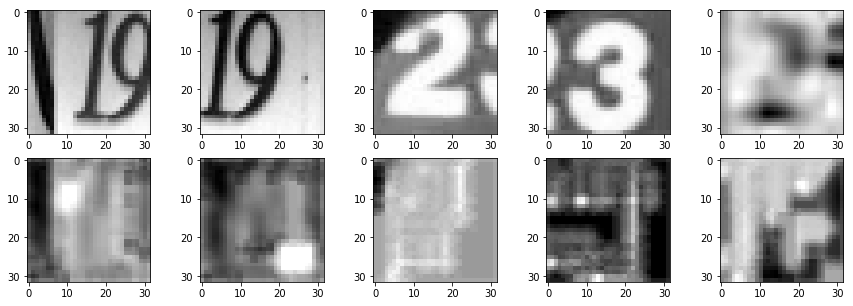

In [16]:
n = 5
plt.figure(figsize=(15, 5))
for i in range(n):
    rand = np.random.randint(len(img_gray))
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img_gray[i].reshape(32, 32), cmap='gray')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i].reshape(32, 32), cmap='gray')
plt.show()

Examples of original and decoded images created with a convolutional autoencoder

Compared to the decoded images from the previous chapter, our output has improved significantly.